In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/diabetes.csv


### Import Necessary Libraries for Analyses

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('seaborn')

In [3]:
# read in csv file of diabetes
df = pd.read_csv('/kaggle/input/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Preprocessing

In [4]:
# use info() method to get an idea of the data-types, column names, and null value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.shape

(768, 9)

## From the above analyses  

*Glucose, BloodPressure, SkinThickness, Insulin, BMI contain zero values which logically do not make sense*  
**Fill these values with np.nan values then replace it with the mean of the column**  
*Data set has 768 rows and 9 columns*

In [7]:
# create a copy of data frame 
df_new = df.copy(deep=True)

In [8]:
# calculate mean of each column/feature that has null values
gluc_avg = df_new['Glucose'].mean()
blood_avg = df_new['BloodPressure'].mean()
skin_avg = df_new['SkinThickness'].mean()
insu_avg = df_new['Insulin'].mean()
bmi_avg = df_new['BMI'].mean()

In [9]:
# replace null values with mean
df_new['Glucose'].replace(0, gluc_avg, inplace = True)
df_new['BloodPressure'].replace(0, blood_avg, inplace = True)
df_new['SkinThickness'].replace(0, skin_avg, inplace = True)
df_new['Insulin'].replace(0, insu_avg, inplace = True)
df_new['BMI'].replace(0, bmi_avg, inplace = True)

In [10]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


### Export cleaned file

In [11]:
# pd.to_csv(df_new)

# Data Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc9a9a3550>,
      dtype=object)

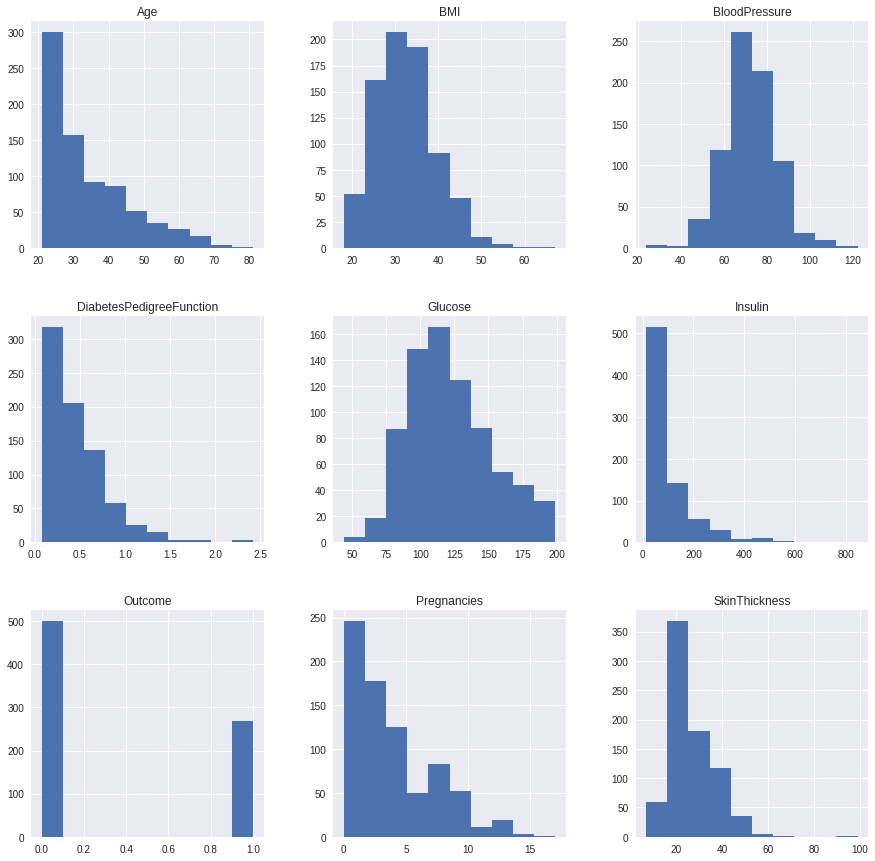

In [12]:
# view distribution of variable
df_new.hist(figsize=(15,15))

1    268
0    500
Name: Outcome, dtype: int64


Text(0, 0.5, 'Total')

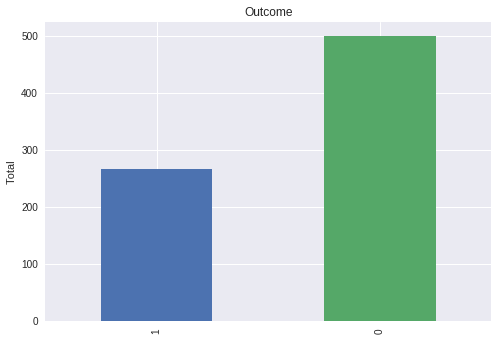

In [13]:
# identify 'outcome' column and count values for each outcome
outcome_counts = df['Outcome'].value_counts().sort_values()
print(outcome_counts)
outcome_counts.plot(kind='bar')
plt.title('Outcome')
plt.ylabel('Total')

**We see here that the outcome for non-diabetes is almost double that of patients with diabetes. It is biased towards the data points with a zero value**  

*Use seaborns pairplot to analyse the data further. The distplot shows the distribution of the variables while the scatter plot shows the relationship between variables (linear/non-linear etc).*

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


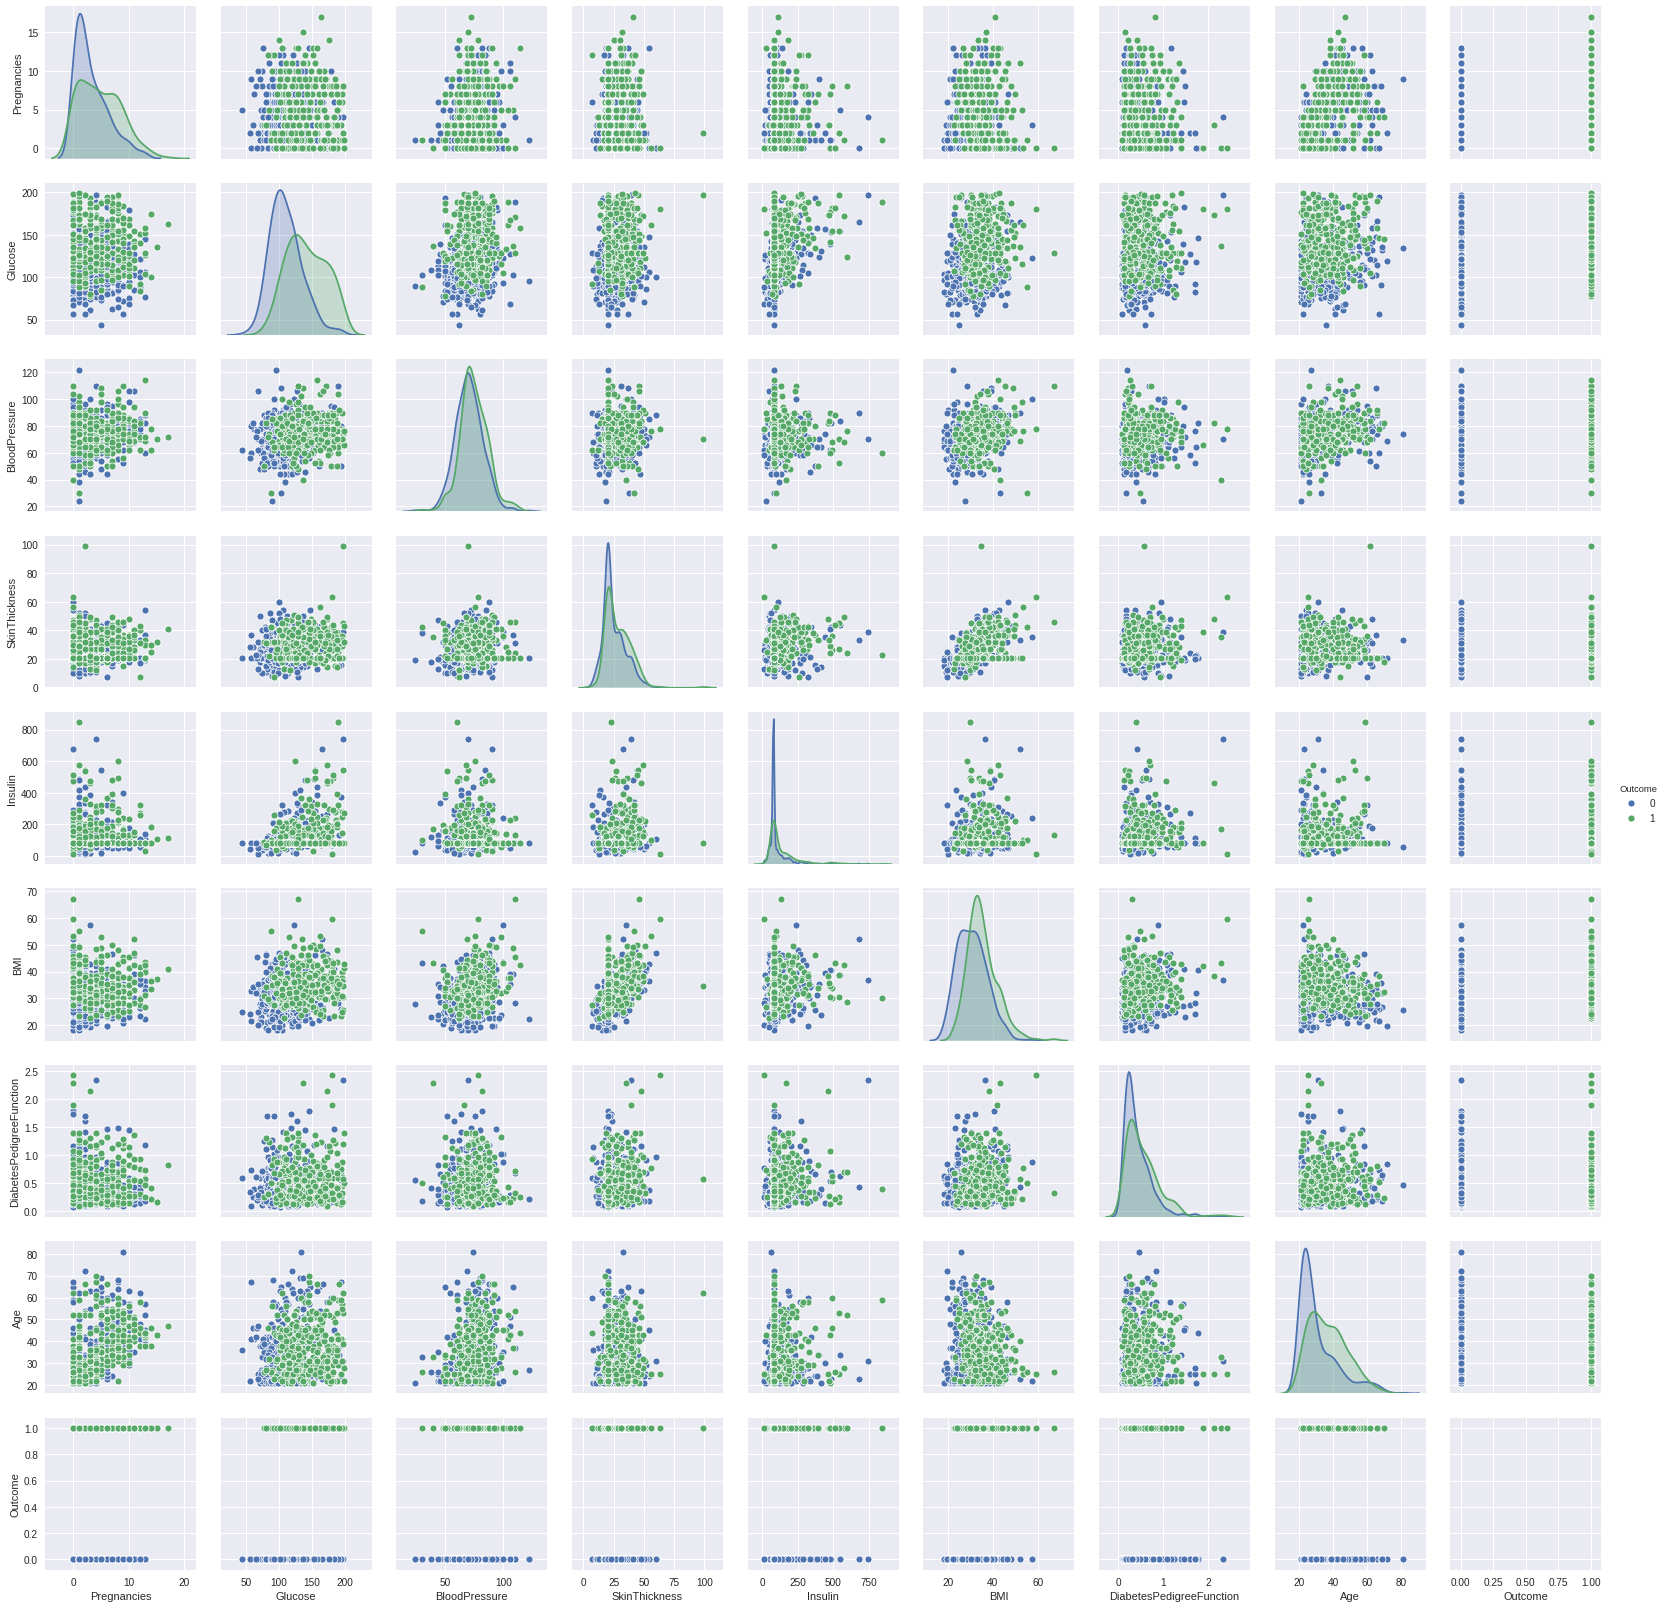

In [14]:
sns.pairplot(df_new, hue='Outcome')

**The Dataset will benefit by using normalization techniques**

In [15]:
# identify correlation between dependent and independent variables
df_new.corr()['Outcome'].sort_values()

BloodPressure               0.162986
DiabetesPedigreeFunction    0.173844
SkinThickness               0.175026
Insulin                     0.179185
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.312254
Glucose                     0.492908
Outcome                     1.000000
Name: Outcome, dtype: float64

**There is a weak correlation between features and target variable, except for 'Glucose', and 'BMI'**

# Normalization

In [16]:
# independent/feature variables
X = df_new[['Pregnancies', 'Glucose', 
            'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 
            'Age']]
# dependent/target variablea
Y = df_new['Outcome']

# create scale object
scale = StandardScaler()
# scale x_data ie features
X = scale.fit_transform(X)

In [17]:
# train test and split data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_train.shape)

(614, 8) (614,)
(154, 8) (614,)


In [18]:
ks = 30
train_score = []
test_score = []

for i in range(1,ks):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    yhat = knn.predict(x_test)
    
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))     # alternatively use metrics.accuracy_score(y_test, yhat)

In [19]:
# convert to numpy array for access of best k value
test_score = np.array(test_score)
train_score = np.array(train_score)

In [20]:
# best k value
best_k = test_score.argmax()
print('Best value for k: ', best_k)
high_score = test_score.max()  # alternatively use test_score[9]
print('Accuracy score of: ', high_score)

Best value for k:  23
Accuracy score of:  0.8311688311688312


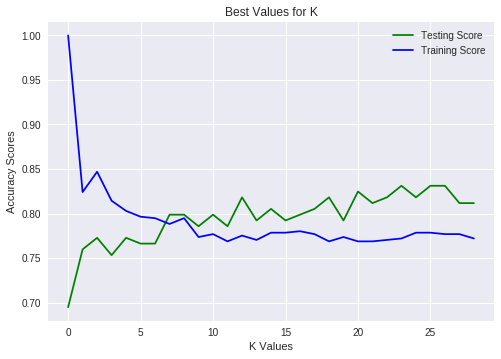

In [21]:
# visualise training and testing data
sns.lineplot(range(ks-1), test_score, color='g', label='Testing Score')
sns.lineplot(range(ks-1), train_score, color='b', label='Training Score')
plt.title('Best Values for K')
plt.xlabel('K Values')
plt.ylabel('Accuracy Scores')
plt.show()

## Build Final Model  

**Use k=23 for the KNN classifier as it produces the highest score**

In [22]:
k = 23

# build model
KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(x_train, y_train)

# prediction
yhat = KNN.predict(x_test)
final_score = KNN.score(x_test, y_test)
print('Score: ', final_score)


Score:  0.8181818181818182


Text(0.5, 28.5, 'Predicted label')

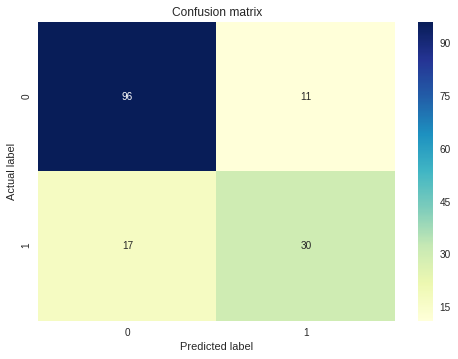

In [23]:
# Confusion Matrix
matrix = confusion_matrix(y_test, yhat)

sns.heatmap(pd.DataFrame(matrix), annot=True,  cmap="YlGnBu" , fmt='.2g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
# Classification report
class_report = classification_report(y_test,yhat)
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154



In [25]:
# another way to see results from the confusion matrix
print('TP - True Negative: ',matrix[0,0])
print('FP - False Positive: ', matrix[0,1])
print('FN - False Negative: ', matrix[1,0])
print('TP - True Positive: ', matrix[1,1])
print('Accuracy Rate: ', np.divide(np.sum([matrix[0,0],matrix[1,1]]),np.sum(matrix)))
print('Misclassification Rate: ', np.divide(np.sum([matrix[0,1],matrix[1,0]]),np.sum(matrix)))

TP - True Negative:  96
FP - False Positive:  11
FN - False Negative:  17
TP - True Positive:  30
Accuracy Rate:  0.8181818181818182
Misclassification Rate:  0.18181818181818182


# Conclusion  

*The KNN model can predict the outcome of diabetes with an accuracy (f1_score) of 81.818%*  
*Misclassification rate of 18.181%, showing our model fit the data well.*